# "Zillow for Airfields"
### Lincoln Laboratory
### Group 43
### Evan Marrone

***

### Description: 
A planner enters their requirements and every viable airfield appears with a corresponding score of how good of a choice it would be based on external factors (hotels, contractors, hospitals, etc).

### Possible Routes (I wrote everything and anything that popped into my head)
* Googlemaps (or Yelp) API which counts the local businesses in an area
* 20 square mile zoomed out aerial shot of the airfield and local area - feed a model to predict the rating of the area
* Copy FedEx strategy
* Use GDP data as a factor, richer cities will likely have more accomodations.
* 

## Google Maps Solution

<nav>

<a href="https://developers.google.com/maps/documentation/places/web-service/overview">Google Places API</a>

Idea: Use Google Places API to search the local area around a given airfield. This will give general information about the local area.

### Importing modules

In [1]:
import googlemaps
from datetime import datetime
import time
import pandas as pd
import numpy as np

### API Setup

In [5]:
key = pd.read_csv('api_key.csv')
api_key = list(key)[0]
gmaps = googlemaps.Client(key=api_key)

### Create instances of each airport easily and add to large DB

In [3]:
from airfield import Airfield

# Airfield class takes in: Airport Name, Country, Lat/Long, Search Radius (miles)
airfield1 = Airfield("Gunsan Airport", "South Korea", "35.925961, 126.615667", 5)
airfield1.createDF()
airfield1.df

,Airfield Name,Country,Lodging,Contractors,Restaurants,Hospitals
0,Gunsan Airport,South Korea,57,2,17,3


### Other Example of Features You Can Gather About Surroundings:

In [2]:
from airfield import Airfield
airfield_info = Airfield("Gunsan Airport", "South Korea", "35.925961, 126.615667", 5)
airfield_info.createSummaryDF()
airfield_info.summaryDF

,Category,Average Rating,Number of Category in X Miles
0,lodging,3.9,57
1,hardware_store,4.0,2
2,restaurant,3.9,17
3,hospital,4.3,3


### Aerial Shot Solution

<a href="https://developers.google.com/maps/documentation/maps-static/?_gl=1*lw2w9n*_ga*MzY1MTE4MzkuMTY2MDQwNzk0NQ..*_ga_NRWSTWS78N*MTY2MDY2NDkzMS4zLjEuMTY2MDY2NTcwMS4w
">Google Maps Static Image API</a>

Idea: Use Google Maps Static Image API to take a photo of the local area of every given airfield. Determine our ranking of many airfields then train a model with those rankings to rank the remaining airfields and to keep auto-updating.

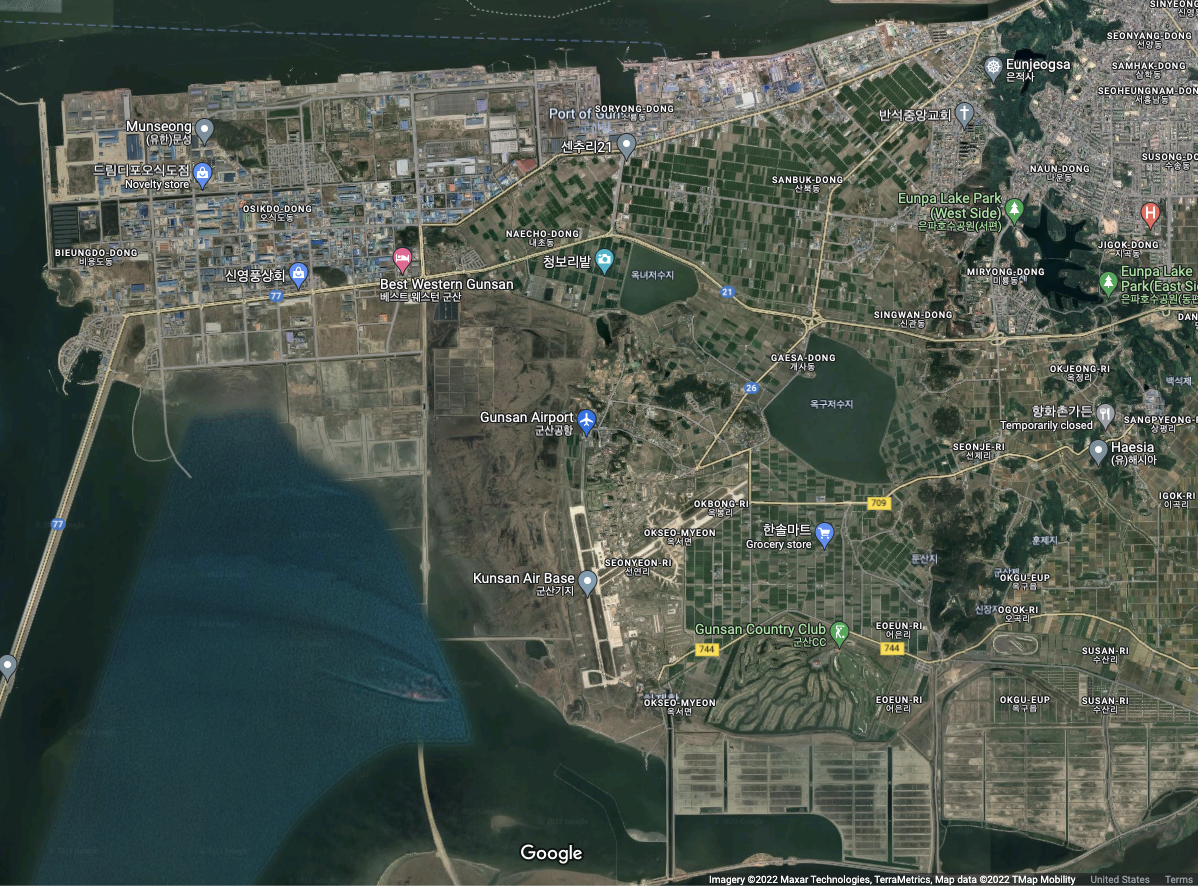

### Other Ideas:
* Copy FedEx - they base their strategy more around where things are being produced and where they dont have airports
* Use GDP data as a factor - City GDP is very hard (if at all possible) to find for most cities

### My Questions:
* Can we talk to airfield surveyors to figure out how they already rate airfields?
* Can we talk to pilots and anyone else who deploys to airfields to figure out what is important for them?
* Is any allied airfield up for grabs?
* What is the true goal of this? Rate the local area in terms of viability?
* Something about exchanging currency?
* Do we have an airfield database already?

### To Go From Here

Determine how many hotels are REQUIRED within X miles for the number of personnel at the airfield. Remove all airfields not fitting that description

Then once the airfields are narrowed down, determine some universal metric to rate a category based on people needed at airfield, rating, and # within X miles
$$ lodging score = \frac{rn}{5N} $$
where 
$$r=\text{Average rating of lodges}$$
$$n=\text{Number of people needed at airfield}$$
$$N=\text{Number of lodges within X miles}$$